In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
project_dir = "./data/"

files = os.listdir(project_dir)
print(files)

['.DS_Store', 'play_by_play_2021.csv', 'play_by_play_2022.csv', 'play_by_play_2019.csv']


In [56]:
target_files = [x for x in files if ("play" in x)]

data_files = [(f'{project_dir}{target_file}') for target_file in target_files]

print(data_files)

['./data/play_by_play_2021.csv', './data/play_by_play_2022.csv', './data/play_by_play_2019.csv']


In [57]:
df = pd.DataFrame()
for fn in data_files:
    df = df._append(pd.read_csv(fn))


df = df.reset_index(drop=True)

print(df.shape)
df.head(10)

/var/folders/hl/nqnnln8n6ms_3p664x49jb2h0000gp/T/ipykernel_48192/3856954115.py:3: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df._append(pd.read_csv(fn))
/var/folders/hl/nqnnln8n6ms_3p664x49jb2h0000gp/T/ipykernel_48192/3856954115.py:3: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df._append(pd.read_csv(fn))
/var/folders/hl/nqnnln8n6ms_3p664x49jb2h0000gp/T/ipykernel_48192/3856954115.py:3: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,209,210,218,219,220,233,234,235,236,237,238,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memo

(148893, 372)


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
5,122,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,1,-0.345293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
9,253,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.182015,0.517965,3.045047,1.0,1.000000,0.998799,0.775463,22.453719


In [58]:
qb_feats = [
    "season",
    "passer_id",
    "passer",
    "pass",
    "complete_pass",
    "interception",
    "sack",
    "yards_gained",
    "touchdown",
]

groupby_feats = ["season", "passer_id", "passer"]

qb_df = df.loc[:, qb_feats].groupby(groupby_feats, as_index=False).sum()

qb_df.head(5)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
0,2019,00-0019596,T.Brady,726,393.0,9.0,27.0,4116.0,28.0
1,2019,00-0020531,D.Brees,448,307.0,5.0,15.0,3072.0,28.0
2,2019,00-0021206,J.McCown,39,21.0,0.0,6.0,191.0,0.0
3,2019,00-0022787,M.Schaub,73,50.0,1.0,2.0,563.0,3.0
4,2019,00-0022803,E.Manning,160,91.0,5.0,5.0,1004.0,6.0


In [59]:
qb_copy = qb_df.copy()

qb_copy['season'] = qb_copy['season'] + 1

qb_new = (qb_df.merge(qb_copy, on=['season', 'passer_id', 'passer'], suffixes=('', '_prev'), how='left'))

qb_new.sample(10)


,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
66,2019,00-0032943,R.Dixon,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
235,2021,00-0037013,Z.Wilson,467,213.0,11.0,44.0,2148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
64,2019,00-0032543,A.Erickson,1,1.0,0.0,0.0,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
39,2019,00-0030465,K.Barner,1,1.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
292,2022,00-0033958,N.Peterman,27,14.0,1.0,1.0,140.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
27,2019,00-0028118,T.Taylor,6,4.0,0.0,0.0,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
247,2022,00-0027948,B.Gabbert,8,6.0,0.0,0.0,29.0,1.0,14.0,7.0,0.0,1.0,57.0,0.0
111,2021,00-0019596,T.Brady,879,544.0,13.0,29.0,5799.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
0,2019,00-0019596,T.Brady,726,393.0,9.0,27.0,4116.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
207,2021,00-0035685,D.Montgomery,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [69]:
features = [
    "pass_prev",
    "complete_pass_prev",
    "interception_prev",
    "sack_prev",
    "yards_gained_prev",
    "touchdown_prev",
]

target = "touchdown"

qb_new = qb_new.fillna(0)
model_data = qb_new.dropna(subset=features + [target])

train_data = (model_data.loc[model_data['season']!=2022])

test_data = (model_data.loc[model_data['season']==2022])

model = LinearRegression()

model.fit(train_data.loc[:, features], train_data[target])

preds = model.predict(test_data.loc[:, features])

preds = pd.Series(preds, index=test_data.index)

test_data['preds'] = preds

/var/folders/hl/nqnnln8n6ms_3p664x49jb2h0000gp/T/ipykernel_48192/708472278.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [70]:
rmse = mean_squared_error(test_data["touchdown"], test_data["preds"]) ** 0.5
r2 = pearsonr(test_data["touchdown"], test_data["preds"])[0] ** 2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 11.319874498834697
r2: nan


/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


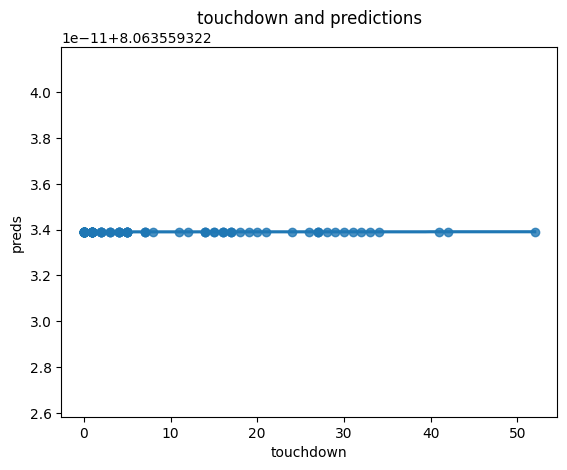

In [71]:
sns.regplot(data=test_data, x="touchdown", y="preds")
plt.title("touchdown and predictions")
plt.show()

In [72]:
test_data.loc[:, ["season", "passer_id", "passer", "touchdown", "preds"]].sort_values(
    "touchdown", ascending=False
).head(10)

,season,passer_id,passer,touchdown,preds
287,2022,00-0033873,P.Mahomes,52.0,8.063559
329,2022,00-0036442,J.Burrow,42.0,8.063559
301,2022,00-0034857,J.Allen,41.0,8.063559
253,2022,00-0029604,K.Cousins,34.0,8.063559
256,2022,00-0030565,G.Smith,33.0,8.063559
275,2022,00-0033106,J.Goff,32.0,8.063559
274,2022,00-0033077,D.Prescott,31.0,8.063559
336,2022,00-0036971,T.Lawrence,30.0,8.063559
327,2022,00-0036389,J.Hurts,29.0,8.063559
238,2022,00-0023459,A.Rodgers,28.0,8.063559
